# Cenário: Efetividade de Defesa Aérea para Proteção de Ponto Sensível

### Descrição Geral:
Este cenário explora a eficácia de diferentes estratégias de defesa aérea para prevenir que aeronaves hostis se aproximem de um ponto sensível. Considera-se três abordagens principais para a estrutura de defesa:

1. **GBAD de Longo Alcance e Médio Alcance**: Utilização de sistemas de defesa aérea baseados no solo (Ground-Based Air Defense - GBAD) capazes de alcançar altas altitudes e distâncias intermediárias.
2. **Aeronaves de Caça em CAP (ALEVOO)**: Emprego exclusivo de aeronaves de caça em patrulhas aéreas de combate (Combat Air Patrol - CAP) para interceptação rápida e flexível. As aeronaves designadas para CAP estão, na verdade, realizando ALEVOO, ou seja, mantendo-se em alerta em voo. Essa tática envolve realizar patrulhas aéreas de combate ao redor de um ponto estratégico, estando prontas para reagir a qualquer aproximação hostil com rapidez.
3. **Combinação de GBAD de Médio Alcance com Aeronaves de Caça**: Estratégia híbrida que combina GBAD de médio alcance para uma camada inicial de defesa, complementada por aeronaves de caça em CAP para cobertura e reação dinâmica.

### Casos:
- **Caso 1**: 2 Ataque + 2 Sweep x GBAD Longo e Médio Alcance

<img src='./air_defense_demo_2_1.gif' width='450' height='350'> 

- **Caso 2**: 2 Ataque + 2 Sweep x 2 Alevoo

<img src='./air_defense_demo_2_2.gif' width='450' height='350'> 

- **Caso 3**: 2 Ataque + 2 Sweep x 2 Alevoo + GBAD Médio Alcance

<img src='./air_defense_demo_2_3.gif' width='450' height='350'>

### Características do Inimigo:
O adversário está operando com quatro aeronaves, divididas em duas missões distintas:
- **Aeronaves Striker**: Duas aeronaves especializadas em ataques ao solo, responsáveis por missões de ataque direto a alvos estratégicos.
- **Aeronaves Sweep**: Duas aeronaves encarregadas de missões de varredura, buscando estabelecer superioridade aérea e eliminar ameaças antes que as aeronaves striker realizem seus ataques.

### Métrica de Avaliação - Ameaça à Área Sensível (AAS):
A eficácia das estratégias de defesa é avaliada usando a métrica "Ameaça à Área Sensível" (AAS), que se baseia no TCPA (Time to Closest Point of Approach). A AAS mede o número de vezes que o TCPA atinge um limiar crítico de 5 minutos ou uma distância de 10 milhas náuticas do ponto sensível. Esta métrica oferece uma indicação clara da iminência e gravidade da ameaça, permitindo uma análise objetiva da performance de cada estratégia de defesa.

O TCPA, ou "Time to Closest Point of Approach", é um cálculo utilizado para determinar o tempo restante até que uma aeronave, ou outro objeto, chegue ao ponto mais próximo de um ponto de interesse, assumindo que mantenha sua velocidade e trajetória atuais. O TCPA é expresso em termos de tempo (geralmente minutos ou horas) e é uma ferramenta crucial para avaliar situações de potencial colisão ou aproximação perigosa, especialmente em contextos de defesa e segurança aérea. Ao calcular o TCPA, é possível antecipar quando e quão perto uma aeronave se aproximará de um ponto sensível, permitindo medidas de defesa e prevenção apropriadas.

<img src='./aas_metric.gif'  width='450' height='500'>

### Considerações Operacionais:
- A área do país azul está definida como um região quadricular de aproximadademnte 34 mil quilômetros quadrados (185 quilômetros de lado).
- O cenário assume uma ameaça potencial de múltiplos vetores de ataque, incluindo aeronaves de alta performance, bombas de ataque ao solo e mísseis ar-ar e solo-ar.



**Esta célula importa todos os módulos necessários para execução e análise das simulações.**

In [1]:
# Bibliotecas para análise de dados e plotagem
import pandas as pd           # Biblioteca para análise e manipulação de dados, apelidada de 'pd'.
import matplotlib.pyplot as plt # Biblioteca para criar visualizações de dados estáticas, animadas e interativas, apelidada de 'plt'.
import seaborn as sns         # Biblioteca baseada em matplotlib para desenhar gráficos estatísticos atraentes e informativos.

# Biblioteca específica
import asapy                  # Fornece vinculações Python para a API AsaPy.

# Configurações de exibição
import warnings               # Biblioteca para manipular avisos.
warnings.filterwarnings('ignore') # Suprime avisos para tornar a saída mais limpa.

2023-12-18 17:29:01.205408: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 17:29:01.258616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 17:29:01.259950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 17:29:02.237024: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


## EXPERIMENTO: Comparação da Efetividade de Estratégias de Defesa Aérea Utilizando a Métrica AAS

### Objetivo do Experimento:
O objetivo deste experimento é comparar a eficácia das três estratégias de defesa aérea — GBAD de longo alcance e médio alcance, aeronaves de caça em CAP, e a combinação de GBAD de médio alcance com aeronaves de caça — utilizando a métrica "Ameaça à Área Sensível" (AAS). O experimento buscará determinar qual estratégia minimiza mais efetivamente a AAS em um cenário de simulação de ameaças aéreas.

### Metodologia:
- **Dados Utilizados**: Coleta de dados de **120** simulações de conflitos aéreos, onde as variáveis de interesse são o número de frames onde o TCPA atinge o limiar de 5 minutos a 10 milhas náuticas do ponto sensível. A única variação que ocorreu entre as simulações (alias) foi a `seed` utilizada em cada experimento, garantindo a estocasticadade das respostas.
- **Análise Estatística**: Implementação de ANOVA (Análise de Variância) para determinar se há diferenças significativas na AAS entre as diferentes estratégias de defesa. Além disso, o método Bootstrap será aplicado para estimar a precisão das estimativas das diferenças entre as médias.
- **Visualização de Dados**: Criação de gráficos boxplots com média e mediana para ilustrar a diferença na métrica AAS entre as estratégias de defesa.

### Hipótese:
A análise sugere uma variação significativa na eficácia das estratégias de defesa examinadas, com algumas abordagens proporcionando uma proteção mais robusta ao ponto sensível do que outras. Esta discrepância de desempenho implica que certas táticas são mais efetivas na prevenção de ameaças iminentes, destacando a importância de uma seleção estratégica baseada em evidências para a defesa de áreas críticas.

### Resultados Esperados:
Espera-se que o experimento revele diferenças estatisticamente significativas entre as estratégias de defesa aérea, oferecendo insights sobre a eficácia relativa de cada abordagem. A análise poderá informar decisões estratégicas sobre como implementar recursos de defesa aérea em cenários reais.

### Aplicações Potenciais:
Os resultados do experimento poderiam ser aplicados para melhorar a tomada de decisões em situações de defesa aérea, treinamento de pessoal, desenvolvimento de táticas operacionais e otimização da alocação de recursos em simulações de defesa.


#### Carregando Dados das Simulações

Nesta célula, estamos carregando dados de diferentes simulações a partir de arquivos CSV. Para cada cenário, existem dois tipos de arquivos:

1. Arquivos `*_aliases.csv`: Estes contêm as entradas (ou parâmetros) para cada simulação.

2. Arquivos `*_output.csv`: Estes contêm os resultados das simulações. 

Os dados são lidos e carregados em DataFrames do pandas para análise e processamento subsequentes.

Serão carregados os dados de cada caso em diferentes dataframes - (x1,y1), (x1,y2), (x3,y3).


In [2]:
x1 = pd.read_csv('./air_defense_demo_2_1_aliases.csv')
y1 = pd.read_csv('./air_defense_demo_2_1_output.csv')

x2 = pd.read_csv('./air_defense_demo_2_2_aliases.csv')
y2 = pd.read_csv('./air_defense_demo_2_2_output.csv')

x3 = pd.read_csv('./air_defense_demo_2_3_aliases.csv')
y3 = pd.read_csv('./air_defense_demo_2_3_output.csv')

### Criar objeto Preprocessing e Pré-processar Dados

O seguinte trecho de código é parte fundamental do processo de preparação dos dados brutos provenientes das simulações. Utilizando a biblioteca AsaPy, o código aborda três áreas principais: aliases, mensagens do tipo monitor report e mensagens do tipo weapon detonation. 

1. **Criação do objeto Preprocessing:** Utilizando a classe `Preprocessing` da biblioteca AsaPy, é criado um objeto `preprocessing`. Essa instância facilita a aplicação de métodos de pré-processamento específicos nos dados brutos das simulações.

2. **Pré-processamento de Aliases:** A função `preprocessing.aliases()` é utilizada para processar os aliases, convertendo-os de um formato bruto para uma representação mais acessível e interpretável.

3. **Pré-processamento de Air Threat Metric:** Através da funções `preprocessing.air_threat_metric()`, os dados brutos das mensagens do tipo `Air Threat Metric` são transformados em um formato que facilita a análise.

Este conjunto de operações desempenha um papel vital na análise de dados das simulações, pois transforma informações brutas e complexas em uma forma que é mais facilmente manipulada e entendida, estabelecendo assim uma base sólida para investigações posteriores.

Criação do objeto preprocessing e preprocessamento dos aliases e dos outputs das simulações

In [3]:
# Criação do objeto preprocessing
preprocessing  = asapy.Preprocessing()

# Função para pré-processar o DataFrame de aliases
x1 = preprocessing.aliases(x1)
x2 = preprocessing.aliases(x2)
x3 = preprocessing.aliases(x3)

# Função para pré-processar o DataFrame de resultados do tipo Team Metrics
y1 = preprocessing.air_threat_metric(y1)
y2 = preprocessing.air_threat_metric(y2)
y3 = preprocessing.air_threat_metric(y3)

Visualização dos aliases tratados

In [4]:
x1.head(5)

,seed
experiment,
0,625734358
1,378305978
2,236444018
3,868777220
4,140770705


Visualização dos resultados tratados das simulações

In [5]:
y1.head(5)

,threat_index
experiment,
0,16371
1,14623
2,14874
3,13472
4,13658


### ANOVA (ANalysis Of VAriance)

- O teste ANOVA é usado para comparar as médias de mais de 2 grupos
- As diferenças das médias dos grupos são inferidas analisando-se as variâncias
- A ANOVA usa o teste F baseado em variância para verificar a igualdade da média do grupo. O teste F é uma proporção da variância entre grupos pela variância dentro do grupo. Às vezes, o teste F da ANOVA também é chamado de teste omnibus, pois testa uma hipótese nula não específica, ou seja, todas as médias dos grupos são iguais

- Hipóteses ANOVA 
    - Hipótese nula: As médias dos grupos são iguais (sem variação nas médias dos grupos)
    - H0: μ1 = μ2 = ... = μp
    - Hipótese alternativa: Pelo menos, uma média do grupo é diferente dos outros grupos
    - H1: Todas as μ não são iguais

**Resíduos**

- Resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo. No contexto de ANOVA, os resíduos representam as diferenças entre cada ponto de dados e a média correspondente do seu grupo (ou a média prevista pelo modelo inteiro, se houver vários fatores envolvidos).

- Analisar os resíduos pode ser uma parte vital da verificação se as suposições de um modelo linear foram cumpridas. Padrões ou tendências nos resíduos podem indicar violações dessas suposições. Os resíduos devem idealmente ser normalmente distribuídos e ter variância constante.

**Quantis Teóricos**

- Quantis teóricos, também conhecidos como pontos quantil-quantil (QQ), são os valores esperados dos quantis de uma distribuição normal padrão. Quando plotados contra os quantis reais de um conjunto de dados, eles formam o que é conhecido como um gráfico QQ.

- Um gráfico QQ é um método gráfico usado para ajudar a avaliar se um conjunto de dados segue uma distribuição teórica particular, como a distribuição normal. Se os pontos em um gráfico QQ estiverem ao longo de uma linha diagonal reta (geralmente y = x), isso indica que os dados seguem a distribuição esperada.

**Usando o Gráfico QQ com Resíduos**

- Ao avaliar a suposição de normalidade em ANOVA, é comum plotar os resíduos contra os quantis teóricos da distribuição normal usando um gráfico QQ. Isso fornece uma maneira visual de ver se os resíduos seguem uma distribuição normal.

- Se os resíduos seguirem uma distribuição normal, os pontos no gráfico QQ estarão aproximadamente ao longo da linha y = x. Se eles desviarem dessa linha, especialmente de maneira sistemática, isso pode indicar não normalidade nos resíduos, violando potencialmente uma suposição de ANOVA.

- Os gráficos QQ são valiosos, especialmente para grandes tamanhos de amostra, pois comunicam visualmente informações sobre a distribuição dos resíduos, permitindo um julgamento rápido sobre as suposições de normalidade. Eles podem frequentemente revelar sutilezas que podem não ser detectadas por testes estatísticos formais, como o teste de Shapiro-Wilk.

Para responder a perguntar: 

"**Considerando as condições estabelecidas nos experimentos, qual tática demonstrou ser mais eficaz na defesa de um ponto sensível?**",

precisamos criar um objeto `analysis` Utilizando a classe `Analysis` da biblioteca AsaPy. Então utilizamos o método `anova` e `bootstrap` para observar a relação entre as duas variáveis.

Antes, faremos a criação de um dataframe `df` com os dados de `threat_index`, que chamaremos de `AAS 1`, `AAS 2` e `AAS 3`.

In [6]:
# Realizando o merge dos DataFrames usando 'experiment_index' como chave
df1 = pd.merge(y1, y2, on='experiment', suffixes=(' 1', ' 2'))
df = pd.merge(df1, y3, on='experiment')

# Renomeando as colunas para 'AAS 1', 'AAS 2' e 'AAS 3'
df.columns = ['AAS 1', 'AAS 2', 'AAS 3']
df

,AAS 1,AAS 2,AAS 3
experiment,,,
0,16371,27209,12442
1,14623,15508,33747
2,14874,18696,14026
3,13472,24610,9280
4,13658,29338,25838
...,...,...,...
115,13296,16423,19726
116,11210,24460,17556
117,10929,39112,2623


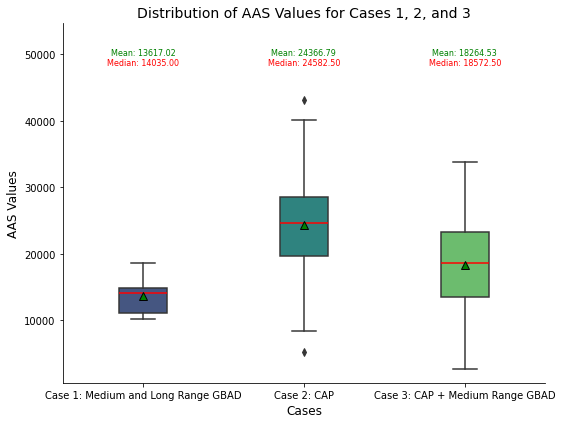

Running ANOVA test

Residuals DO NOT follow a normal distribution. The ANOVA results may not be valid.

Variances ARE NOT homogeneous across the groups. The result may not be valid.



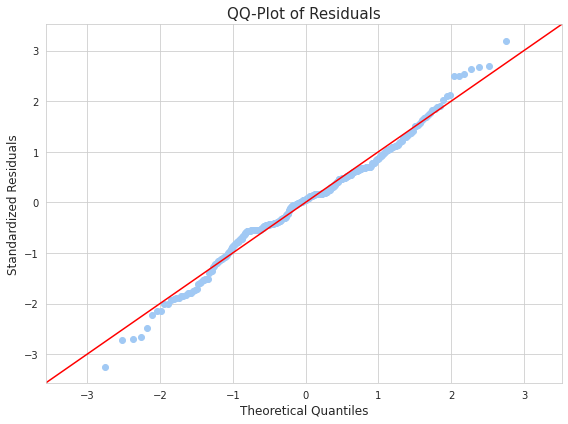

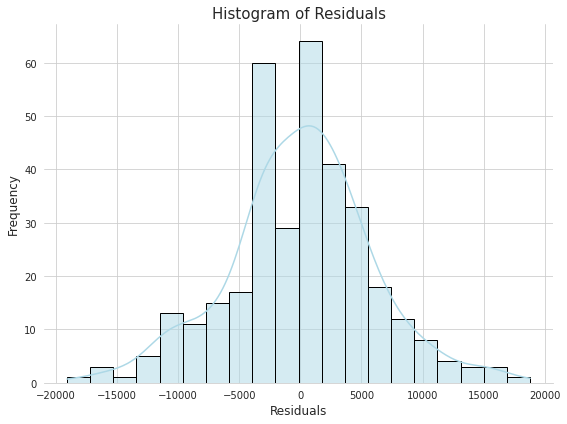

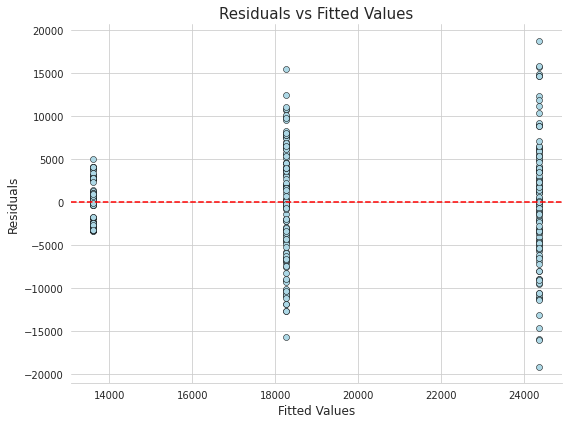


ANOVA Summary:

                  sum_sq     df          F        PR(>F)
C(samples)  6.626993e+09    2.0  94.938322  1.820874e-33
Residual    1.183163e+10  339.0        NaN           NaN
The ANOVA test result is significant. There is a statistical difference among the samples.


Post-hoc (Tukey HSD) Test Results:

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
              group1                            group2              meandiff  p-adj   lower      upper    reject
----------------------------------------------------------------------------------------------------------------
Case 1: Medium and Long Range GBAD                     Case 2: CAP 10749.7719  -0.0  8907.7213 12591.8225   True
Case 1: Medium and Long Range GBAD Case 3: CAP + Medium Range GBAD  4647.5088   0.0  2805.4582  6489.5594   True
                       Case 2: CAP Case 3: CAP + Medium Range GBAD -6102.2632   0.0 -7944.3137 -4260.2126   True
-----

In [7]:
# Criação do objeto analysis
analysis = asapy.Analysis()

# Remover outliers de um DataFrame Pandas utilizando o método do Intervalo Interquartil (IQR) de uma só vez.
df_wo_out, drop_lines = analysis.remove_outliers(df)

# Método Anova
anova_table, post_hoc_res = analysis.anova(df=df_wo_out, 
        columns=['AAS 1', 'AAS 2', 'AAS 3'], alpha=0.05, show_plots=True, 
    boxplot_title='Distribution of AAS Values for Cases 1, 2, and 3', 
    boxplot_xlabel='Cases', 
    boxplot_ylabel='AAS Values', 
    boxplot_names=['Case 1: Medium and Long Range GBAD', 'Case 2: CAP', 'Case 3: CAP + Medium Range GBAD']
)

Como os dados não atenderam aos critérios de normalidade exigidos para a **ANOVA**, optaremos por um método não paramétrico, o **Bootstrap**, para realizar comparações detalhadas entre pares de amostras. Esse método é mais adequado para lidar com dados que não seguem uma distribuição normal, permitindo-nos realizar análises comparativas de forma mais adaptada às características específicas dos nossos dados.

### Bootstrap

O teste Bootstrap é uma técnica de reamostragem essencial para estimar a distribuição de amostragem de estimadores estatísticos. Esta técnica é particularmente valiosa em cenários onde métodos tradicionais baseados em distribuições teóricas não são aplicáveis ou eficientes.


#### Características Principais do Teste Bootstrap

- **Não Paramétrico**: Ideal para análise de dados com distribuições não-normais ou desconhecidas, pois não assume uma forma específica para a distribuição dos dados.
- **Reamostragem com Reposição**: Consiste em retirar repetidamente amostras com reposição do conjunto de dados original para calcular a estatística de interesse.
- **Estimativa de Intervalos de Confiança**: Utilizado para gerar intervalos de confiança em torno de estatísticas-chave, como média ou mediana.
- **Versatilidade e Robustez**: Aplicável a uma ampla gama de estatísticas e modelos, mostrando-se eficaz mesmo em amostras de tamanho reduzido.

#### Procedimento do Teste Bootstrap

1. **Extração de Amostras**: Selecionar aleatoriamente 'n' observações da amostra original, com reposição, sendo 'n' o tamanho da amostra original.
2. **Cálculo da Estatística**: Calcular a estatística de interesse para a amostra reamostrada.
3. **Repetição do Processo**: Repetir os passos 1 e 2 várias vezes (ex.: 1000 ou 10000 vezes) para gerar uma distribuição de amostragem.
4. **Inferência Estatística**: Utilizar a distribuição de amostragem obtida para realizar inferências, como a construção de intervalos de confiança ou realização de testes de hipóteses.

#### Formulação das Hipóteses no Teste Bootstrap

- **Hipótese Nula (H0)**: Postula que não há efeito significativo ou diferença estatística na população de onde a amostra foi retirada. Em outras palavras, quaisquer efeitos ou diferenças observadas na amostra podem ser atribuídos à variação aleatória inerente ao processo de amostragem.
- **Hipótese Alternativa (H1)**: Afirma que existe um efeito ou diferença estatística significativa na população, que não pode ser explicada apenas pela variação aleatória. Indica que o efeito ou diferença observado na amostra reflete uma característica verdadeira da população.

-------------------------------------------------------------------------------------
Bootstrap Hypothesis Test Results (Case 1: Medium and Long Range GBAD vs Case 2: CAP)
-------------------------------------------------------------------------------------
Observed difference in means: -10749.7719
Adjusted Bootstrap p-value: 0.0000
Sample 'Case 1: Medium and Long Range GBAD' is statistically lesser than sample 'Case 2: CAP' (p = 0.0000).
-------------------------------------------------------------------------------------



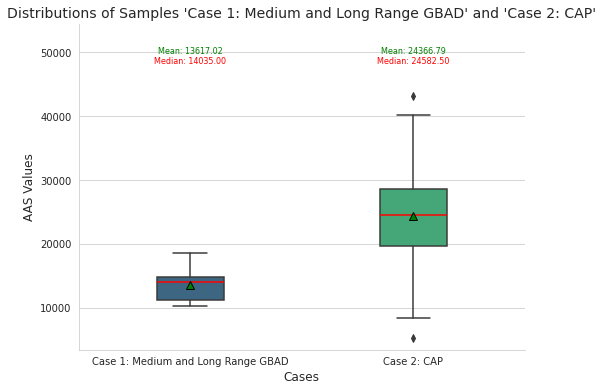

---------------------------------------------------------------------------------------------------------
Bootstrap Hypothesis Test Results (Case 1: Medium and Long Range GBAD vs Case 3: CAP + Medium Range GBAD)
---------------------------------------------------------------------------------------------------------
Observed difference in means: -4647.5088
Adjusted Bootstrap p-value: 0.0000
Sample 'Case 1: Medium and Long Range GBAD' is statistically lesser than sample 'Case 3: CAP + Medium Range GBAD' (p = 0.0000).
---------------------------------------------------------------------------------------------------------



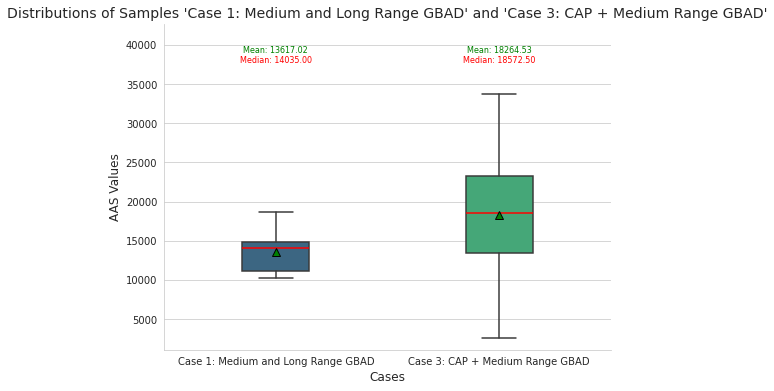

----------------------------------------------------------------------------------
Bootstrap Hypothesis Test Results (Case 2: CAP vs Case 3: CAP + Medium Range GBAD)
----------------------------------------------------------------------------------
Observed difference in means: 6102.2632
Adjusted Bootstrap p-value: 0.0000
Sample 'Case 2: CAP' is statistically greater than sample 'Case 3: CAP + Medium Range GBAD' (p = 0.0000).
----------------------------------------------------------------------------------



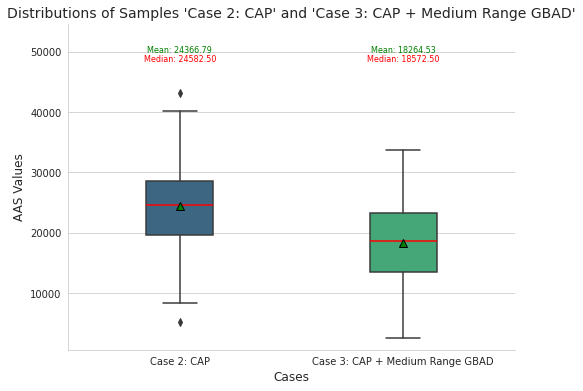

In [8]:
analysis.bootstrap(df_wo_out, ['AAS 1', 'AAS 2', 'AAS 3'], show_plots=True,
    boxplot_xlabel='Cases', 
    boxplot_ylabel='AAS Values', 
    boxplot_names=['Case 1: Medium and Long Range GBAD', 'Case 2: CAP', 'Case 3: CAP + Medium Range GBAD'])

#### Conclusões

- **Superioridade do Caso 1 na Mitigação de Ameaças**: O Caso 1 (GBAD de Médio e Longo Alcance) apresentou uma performance superior com os menores valores médios e medianos de AAS, sugerindo uma capacidade mais efetiva de prevenir aproximações perigosas à área sensível. Isso indica que, dentro das estratégias testadas, o GBAD de Médio e Longo Alcance pode ser a mais eficiente em termos isolados para a métrica de AAS.

- **Combinação de Estratégias e Seu Impacto**: A adição do GBAD de Médio Alcance ao CAP (Caso 3) resultou em valores de AAS menores em comparação ao CAP isolado (Caso 2). Essa diferença significativa, com um p-valor ajustado de 0, enfatiza a vantagem de integrar múltiplas capacidades de defesa.

- **Diferença Estatística**: Em todas as comparações diretas entre os casos, as diferenças são estatisticamente significativas, o que é evidenciado pelos p-valores ajustados de 0.0000. Isso sugere que, para a métrica AAS, as estratégias representadas pelos diferentes casos não são equivalentes em termos de desempenho.

- **Implicações Operacionais**: Com base no desempenho diferenciado entre os casos, sugere-se uma revisão e possível reestruturação das estratégias de defesa. Estratégias combinadas, como as do Caso 3, mostraram-se mais eficazes e devem ser priorizadas para fortalecer a proteção das áreas sensíveis. A análise dos dados sugere que uma avaliação minuciosa do risco é crucial para a alocação eficiente dos recursos de defesa. O Caso 1 pode ser particularmente valioso onde os recursos são limitados, considerando os gastos com vetores aéreos sendo maiores, enquanto a combinação de capacidades, como no Caso 3, pode ser mais adequada quando uma abordagem em camadas é possível e desejável.
